# credit card balance data cleaning

## Import libraries

In [2]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import modules.missing as ms
import warnings
warnings.filterwarnings('ignore')

## Load data

In [3]:
ccb = pd.read_csv('.././data/credit_card_balance.csv')

## Preliminary analysis

In [4]:
pd.set_option('display.max_columns', None)
display(ccb.sample(8))
print(f'Credit Card baalnce data contains:\n{ccb.shape[0]} rows and {ccb.shape[1]} columns')
print(f'\n\nCredit Card balance data information:\n')
print(ccb.info())
print(f'\nStatistical Summary of numerical columns:\n')

numerical = ccb.select_dtypes(include='number')
display(numerical.describe())

categorical = ccb.select_dtypes(include='object')
display(categorical.describe())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
253503,2679222,179400,-55,0.00,247500,0.0,0.00,0.0,0.00,0.00,322.425,0.000,0.00,0.00,0.00,0.0,0,0.0,0.0,33.0,Active,0,0
309080,2130779,268497,-79,0.00,67500,0.0,0.00,0.0,0.00,778.59,1005.570,0.000,0.00,0.00,0.00,0.0,0,0.0,0.0,30.0,Active,0,0
8505,2329113,235465,-64,170525.25,180000,0.0,0.00,0.0,0.00,9000.00,9000.000,9000.000,165208.50,170525.25,170525.25,0.0,0,0.0,0.0,34.0,Active,0,0
764057,1369297,134314,-63,172883.70,180000,0.0,0.00,0.0,0.00,9000.00,0.000,0.000,162150.39,172883.70,172883.70,0.0,0,0.0,0.0,29.0,Active,1,1
2206691,1717779,413276,-16,0.00,112500,0.0,0.00,0.0,0.00,0.00,23.985,0.000,0.00,0.00,0.00,0.0,0,0.0,0.0,54.0,Active,0,0
1913741,2446025,341276,-17,2106.99,450000,0.0,7551.27,0.0,7551.27,23205.69,487350.000,464278.635,0.00,0.00,0.00,0.0,1,0.0,1.0,19.0,Active,0,0
3804211,2832202,321288,-14,0.00,135000,0.0,0.00,0.0,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.0,0,0.0,0.0,68.0,Completed,0,0
2947967,1760409,179082,-10,0.00,0,NaN,0.00,NaN,NaN,0.00,NaN,0.000,0.00,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0


Credit Card baalnce data contains:
3840312 rows and 23 columns


Credit Card balance data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17 

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


,NAME_CONTRACT_STATUS
count,3840312
unique,7
top,Active
freq,3698436


## Duplicate values checking

In [7]:
dup = ccb.duplicated().sum()
print(f'Duplicate rows in the data: {dup}')

Duplicate rows in the data: 0


## Missing values cheking and handling

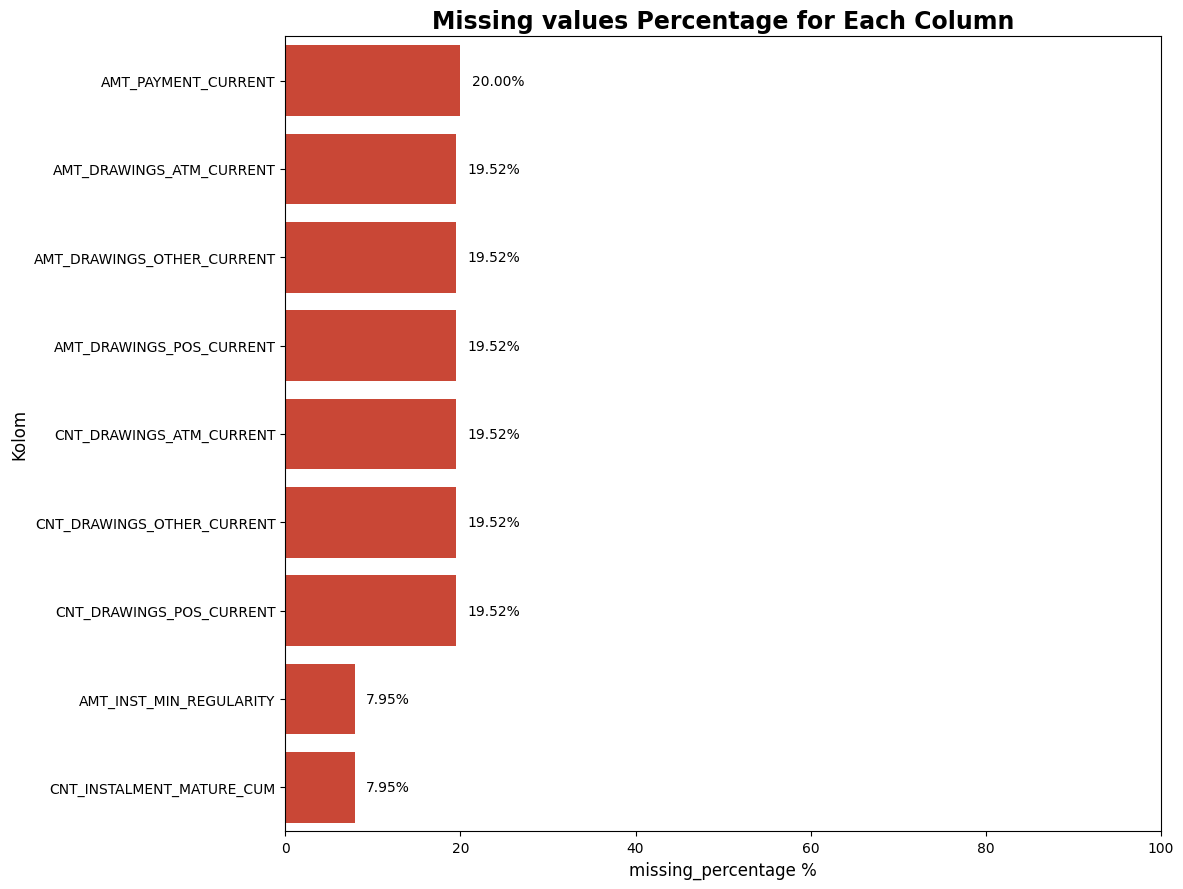

In [5]:
ms.plot_missing_percentage(ccb)


In [6]:
ccb.loc[ccb.AMT_PAYMENT_CURRENT.isna()].sample(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1798122,1693295,310515,-34,227703.825,225000,0.0,224640.0,224640.0,0.0,NaN,NaN,0.0,224640.0,226358.325,226358.325,0.0,1,1.0,0.0,NaN,Active,0,0
1154683,1605161,280082,-2,0.000,90000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Completed,0,0
2997915,1675839,260612,-15,0.000,765000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
2704078,1029602,172720,-17,0.000,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1618751,1024321,278946,-2,0.000,135000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
149570,1375012,272585,-4,0.000,180000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1970957,1496952,205542,-21,0.000,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3250077,1746084,136968,-14,0.000,180000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
801237,1085690,436411,-2,0.000,450000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
2408190,1692803,322999,-17,0.000,180000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


For this data, I decided to fill the missing values with 0 value because the missing values are in the columns representing the balance of the credit card. The missing values may be because the client does not have a credit card or does not have a balance on the credit card, and from the missing pattern, I analyze that the missing values are not missing at random. The missing values are unrelated to the other columns in the data, so I decided to fill the missing values with 0 values.

In [7]:
ccb_clean = ccb.fillna(0)
ccb_clean.to_csv('.././data/credit_card_balance_clean.csv', index=False)